In [1]:

# Import for OpenCV
import cv2

import numpy as np
import matplotlib.pyplot as plt 

# install  libraries in terminal if not found
# pip install matplotlib
# pip install numpy

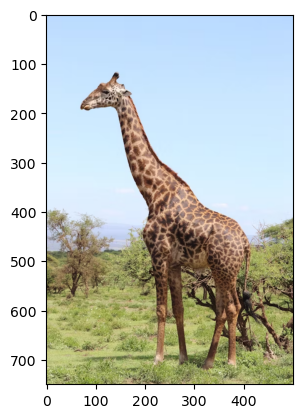

In [2]:

# Load the image and get it as BGR
image = cv2.imread("./Giraf.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

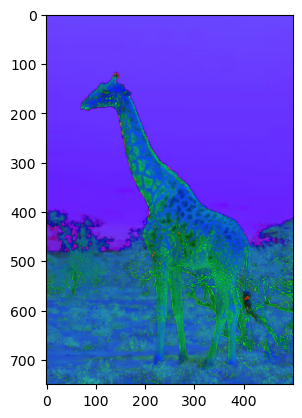

In [3]:

# 1. Convert the image to HSV image
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)

In [4]:
# 2. Target the brownish colors, choose the lower and upper color bounds
'''
    HSV Component	   Range	         Meaning
    Hue      	      5  -- 25	         Covers reddish-brown to light tan
    Saturation	      50 -- 255	         Filters out very gray colors
    Value	          20 -- 200	         Keeps it darker (brown, not orange or white)
'''
lower_white = np.array([5,50,20])
upper_white = np.array([25,255,255])

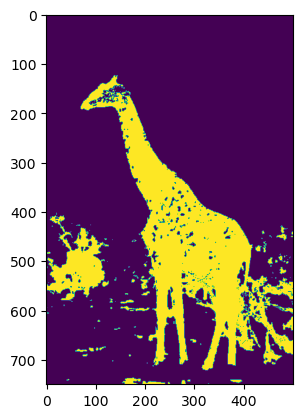

In [5]:

# 3. Creating a binary mask image, so as toselect the brown colors only and near colors to it
mask = cv2.inRange(image_hsv, lower_white, upper_white)
plt.imshow(mask)

In [6]:

# 4. Make segmentaion to isolate the brown colors and extract it 
#  Replace the color you don't want to black
# I want to replace the green color with black 
black_hsv = np.uint8([[[120, 255, 0]]])
#plt.imshow(black_hsv)

black_bgr = cv2.cvtColor(black_hsv, cv2.COLOR_HSV2BGR)[0][0]
# Copy image to image_result
image_result = image.copy()

# Change the image to black bgr
image_result[mask>1] = black_bgr

# Convert the image from BGR to RGB back
image_result_rgb = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)
# Plot the images for comparison

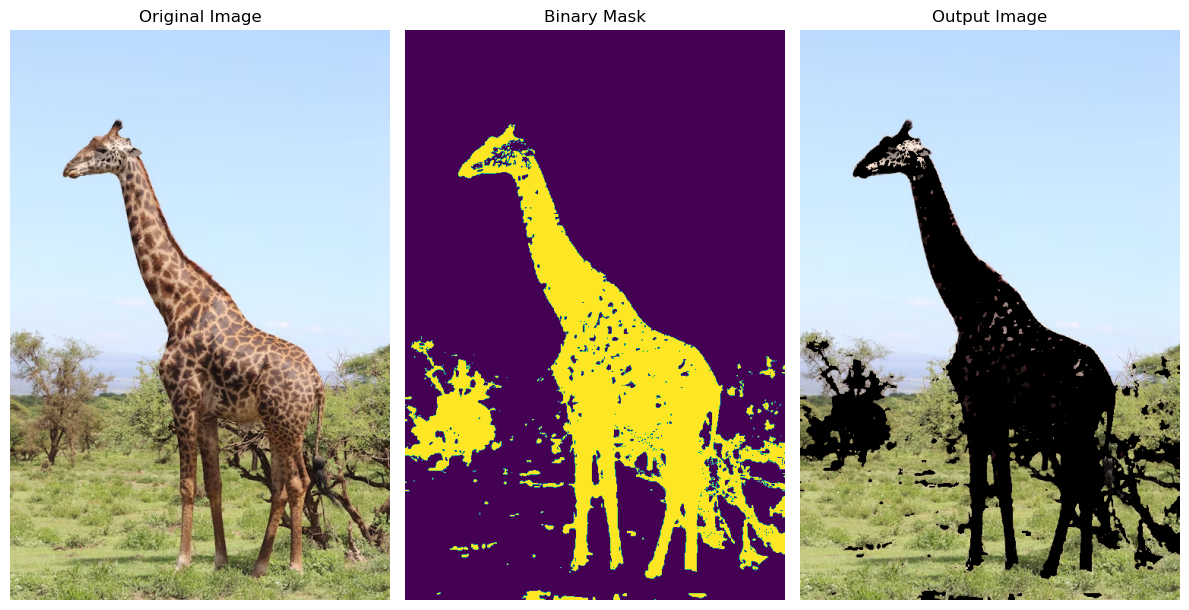

In [7]:

fig, axs = plt.subplots(1,3, figsize=(12,6))
#I want to show the original image 
axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Show the binary mask image 
axs[1].imshow(mask)
axs[1].set_title("Binary Mask")
axs[1].axis('off')

# Show the output image 
axs[2].imshow(image_result_rgb)
axs[2].set_title("Output Image")
axs[2].axis('off')

plt.tight_layout()
plt.show()